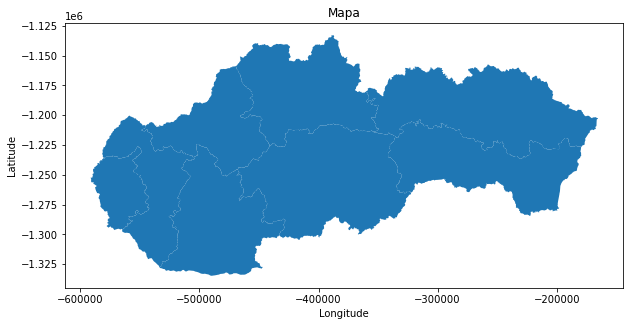

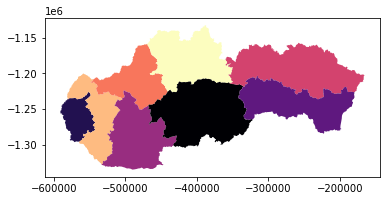

In [24]:
import psycopg2
from dotenv import load_dotenv
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Načítanie premenných prostredia zo súboru .env
load_dotenv()

# Získanie hodnôt premenných prostredia
db_host = os.getenv("p_host")
db_port = os.getenv("p_port")
db_name = os.getenv("p_database")
db_user = os.getenv("p_user")
db_password = os.getenv("p_password")

# Pripojenie k databáze
conn = psycopg2.connect(
    host=db_host,
    port=db_port,
    database=db_name,
    user=db_user,
    password=db_password
)

# Vykonanie príkazu SQL a získanie výsledku ako pandas DataFrame
query = "SELECT * FROM hranice_kraje_1"
df = pd.read_sql(query, conn)

# Zobrazenie tabuľky
df
# Uzatvorenie spojenia s databázou
# conn.close()


# Vykonanie príkazu SQL a získanie výsledku ako GeoPandas DataFrame
query = "SELECT * FROM hranice_kraje_1"
gdf = gpd.read_postgis(query, conn, geom_col='geom')

# Zobrazenie tabuľky
gdf

# Uzatvorenie spojenia s databázou
# conn.close()

# Zobrazenie vektorovej grafiky
#gdf.plot()
#plt.show()



# Upravenie okna grafu
fig, ax = plt.subplots(figsize=(10,10))  # Veľkosť okna grafu (10x10 palcov)
ax.set_aspect('equal')  # Zachovanie rovnakého merítka osí x a y


# Vytvorenie mapy pomocou gdf.plot
gdf.plot(column='nm4', cmap='magma', legend=False)



# Zobrazenie vektorovej grafiky
gdf.plot(ax=ax)

# Pridanie popisu osí
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Pridanie nadpisu
ax.set_title('Mapa')

# Zobrazenie legendy
#ax.legend()

# Zobrazenie grafu
plt.show()


# Uzatvorenie spojenia s databázou
# conn.close()

In [5]:
# Vykonanie príkazu SQL a získanie výsledku ako GeoPandas DataFrame
query = "SELECT * FROM hranice_kraje_1"
gdf = gpd.read_postgis(query, conn, geom_col='geom')

# Zobrazenie tabuľky
gdf

,gid,idn4,nm4,vymera_ha,shape_leng,shape_area,geom
0,1,1.0,Bratislavský kraj,205261.5649,305842.952683,2.051588e+09,"MULTIPOLYGON (((-551190.780 -1226585.100, -551..."
1,2,2.0,Trnavský kraj,414632.4768,584307.846539,4.145075e+09,"MULTIPOLYGON (((-557400.850 -1201296.840, -557..."
2,3,3.0,Trenčiansky kraj,450180.4449,488465.227446,4.500892e+09,"MULTIPOLYGON (((-470032.890 -1159261.460, -469..."
3,4,4.0,Nitriansky kraj,634373.2727,571200.412335,6.342299e+09,"MULTIPOLYGON (((-501142.280 -1224236.340, -501..."
4,5,5.0,Žilinský kraj,680852.4278,585590.390199,6.805994e+09,"MULTIPOLYGON (((-388462.250 -1132935.760, -388..."
5,6,6.0,Banskobystrický kraj,945400.9228,661251.684202,9.452812e+09,"MULTIPOLYGON (((-387476.320 -1207102.860, -387..."
6,7,7.0,Prešovský kraj,897296.1613,814335.812218,8.971035e+09,"MULTIPOLYGON (((-255501.210 -1158859.840, -255..."
7,8,8.0,Košický kraj,675432.4652,693752.319145,6.750809e+09,"MULTIPOLYGON (((-314954.070 -1203561.620, -314..."


In [6]:
# Vykonanie príkazu SQL a získanie výsledku ako pandas DataFrame
query = "SELECT * FROM hranice_kraje_1"
df = pd.read_sql(query, conn)

# Zobrazenie tabuľky
df
# Uzatvorenie spojenia s databázou

,gid,idn4,nm4,vymera_ha,shape_leng,shape_area,geom
0,1,1.0,Bratislavský kraj,205261.5649,305842.952683,2.051588e+09,01060000208A15000001000000010300000001000000CA...
1,2,2.0,Trnavský kraj,414632.4768,584307.846539,4.145075e+09,01060000208A15000001000000010300000001000000EB...
2,3,3.0,Trenčiansky kraj,450180.4449,488465.227446,4.500892e+09,01060000208A150000010000000103000000010000008B...
3,4,4.0,Nitriansky kraj,634373.2727,571200.412335,6.342299e+09,01060000208A15000001000000010300000001000000ED...
4,5,5.0,Žilinský kraj,680852.4278,585590.390199,6.805994e+09,01060000208A1500000100000001030000000100000008...
5,6,6.0,Banskobystrický kraj,945400.9228,661251.684202,9.452812e+09,01060000208A15000001000000010300000001000000CF...
6,7,7.0,Prešovský kraj,897296.1613,814335.812218,8.971035e+09,01060000208A15000001000000010300000001000000D8...
7,8,8.0,Košický kraj,675432.4652,693752.319145,6.750809e+09,01060000208A15000001000000010300000001000000E2...
